In [ ]:
import os
import shutil
import itertools
import pathlib
from PIL import Image
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2
#Data handling tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data_path = "F:/Mahi/brain mri/7022blur/Training"

filepaths =[]

labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
test_data_path = 'F:/Mahi/brain mri/7022blur/Testing'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_size = (224 ,224)
batch_size = 16

ts_gen= ImageDataGenerator()

tr_gen= ImageDataGenerator()
# Create an instance of the ImageDataGenerator

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)
test_gen = ts_gen.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = img_size, class_mode = 'categorical' ,
                                      color_mode= 'rgb', shuffle = False , batch_size = batch_size)

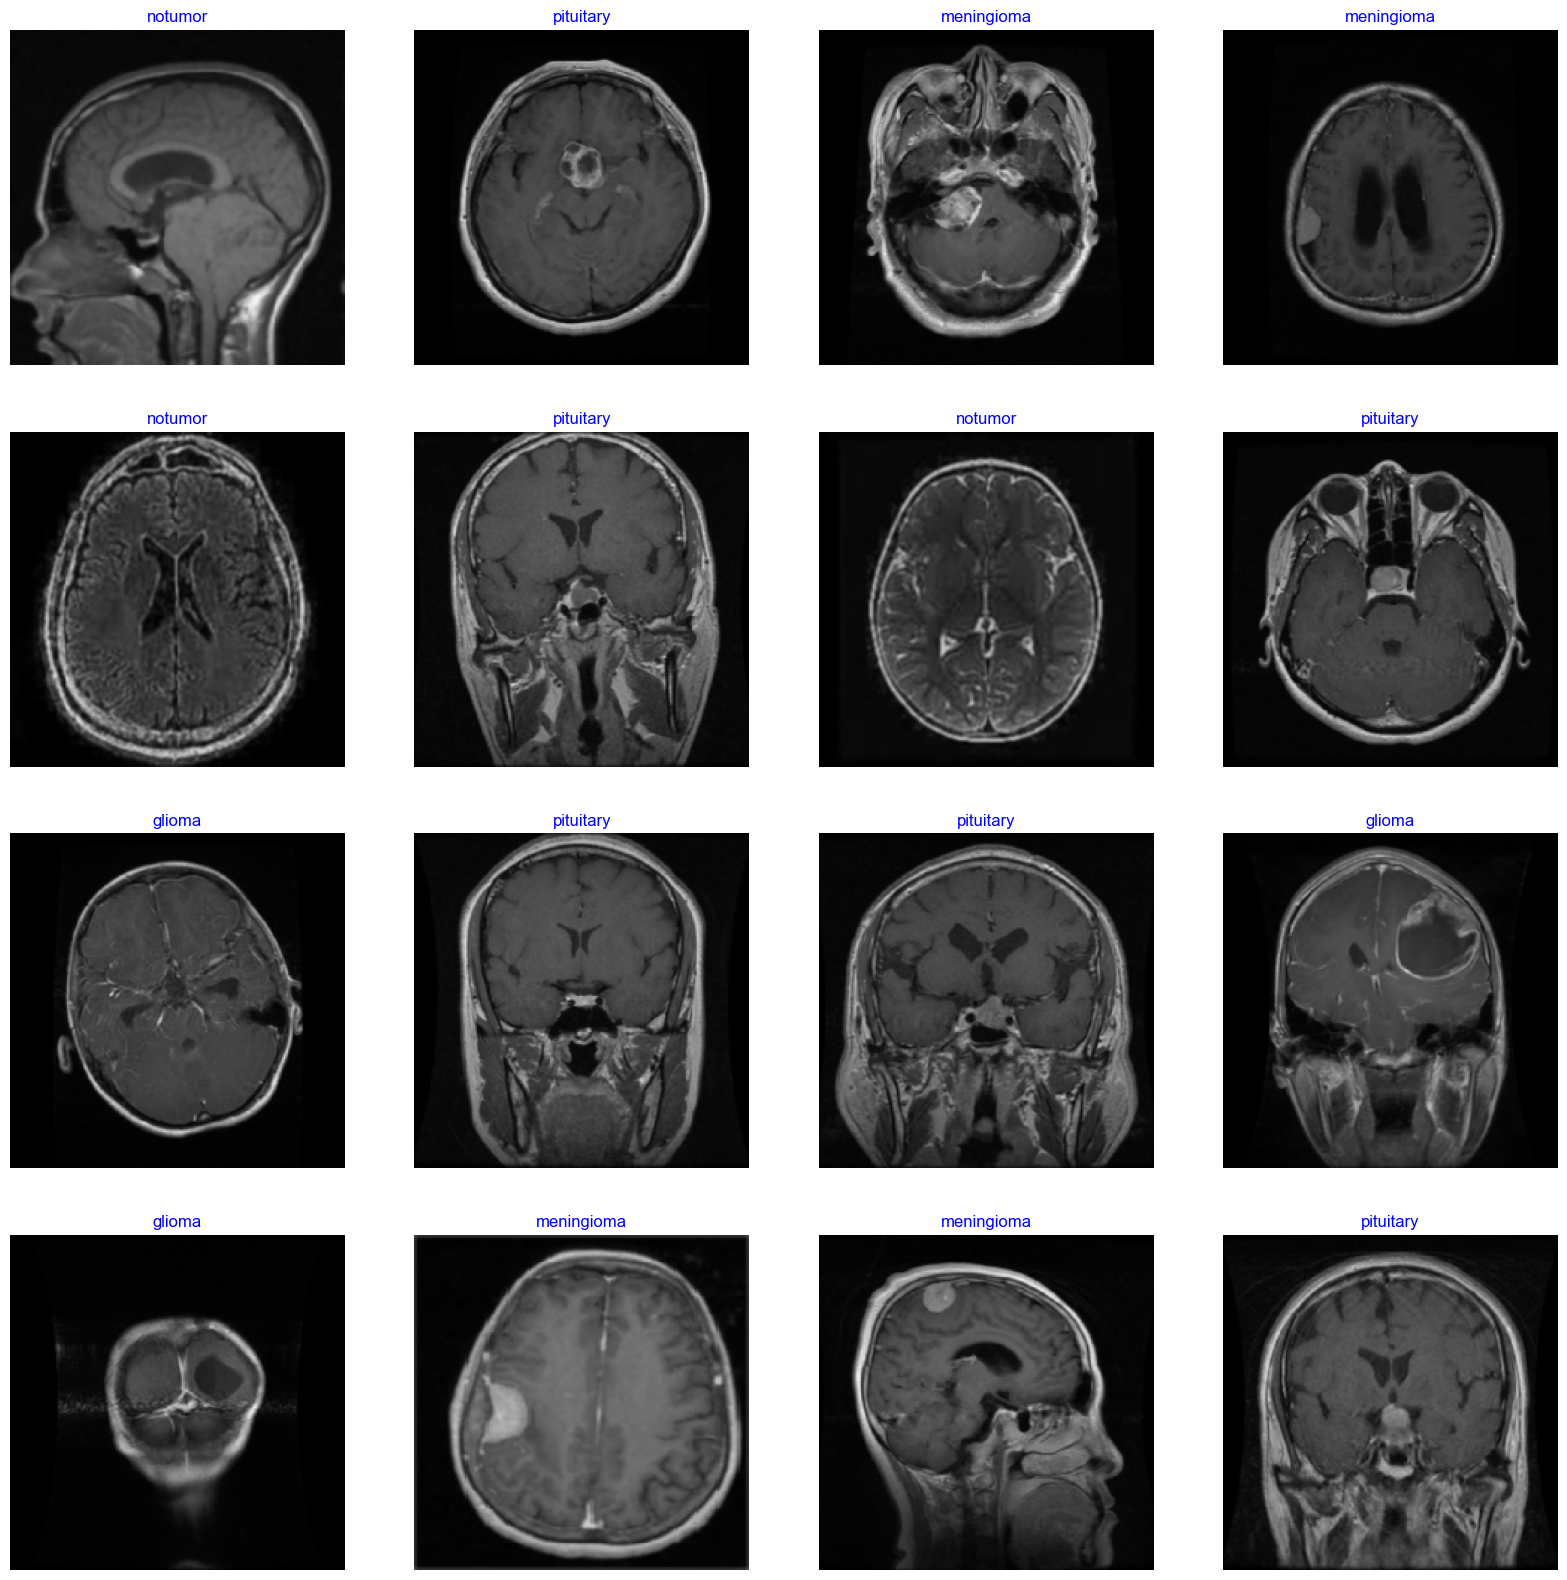

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
#plt.savefig("/content/drive/MyDrive/Dataset.jpg")
plt.show();
# plt.savefig("/content/drive/MyDrive/Dataset.jpg")

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
# Specify the path to save the best model weights
checkpoint_filepath = 'F:\\Mahi\\brain mri\\cnn7022.h5'
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
# Set up the ModelCheckpoint callback to save weights with the highest validation accuracy
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
#Best so far
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers.experimental import preprocessing
#95.29  besttttttttttttttttttttttttttttttttttt
model2 = Sequential()# contrast change by up to 50%)

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

Epoch 1/100
119/119 [==============================] - ETA: 0s - loss: 0.8902 - accuracy: 0.6612
Epoch 1: val_accuracy did not improve from 0.99237
119/119 [==============================] - 8s 55ms/step - loss: 0.8902 - accuracy: 0.6612 - val_loss: 17.1682 - val_accuracy: 0.3089 - lr: 0.0010
Epoch 2/100
118/119 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7945
Epoch 2: val_accuracy did not improve from 0.99237
119/119 [==============================] - 6s 52ms/step - loss: 0.5524 - accuracy: 0.7962 - val_loss: 2.3517 - val_accuracy: 0.4066 - lr: 0.0010
Epoch 3/100
118/119 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.8194
Epoch 3: val_accuracy did not improve from 0.99237
119/119 [==============================] - 6s 53ms/step - loss: 0.4743 - accuracy: 0.8188 - val_loss: 0.5978 - val_accuracy: 0.7773 - lr: 0.0010
Epoch 4/100
119/119 [==============================] - ETA: 0s - loss: 0.3836 - accuracy: 0.8566
Epoch 4: val_accuracy d

In [ ]:
model2.load_weights("F:/Mahi/brain mri/cnn7022.h5")
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes,digits=6))

              precision    recall  f1-score   support

           0   0.983333  0.993266  0.988275       297
           1   0.986928  0.980519  0.983713       308
           2   1.000000  1.000000  1.000000       405
           3   0.996667  0.993355  0.995008       301

    accuracy                       0.992372      1311
   macro avg   0.991732  0.991785  0.991749      1311
weighted avg   0.992388  0.992372  0.992371      1311



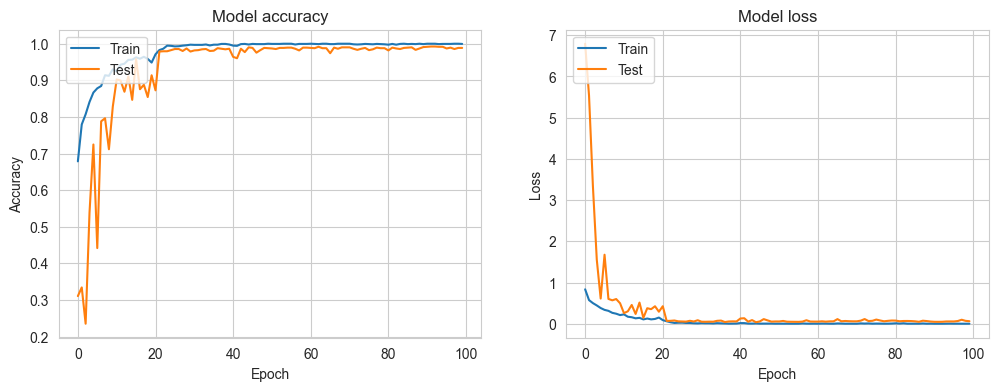

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')

#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


#Grad Cam

In [ ]:
import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img, img_to_array
from keras import backend as K
from scipy.ndimage import zoom
import numpy as np
import os
import tensorflow as tf
import keras
tf.compat.v1.disable_eager_execution()


def generate_cam(input_model, image, layer_name='block5_conv3', H=224, W=224):

    cls = np.argmax(input_model.predict(image)) # Obtain the predicted class
    conv_output = input_model.get_layer(layer_name).output #Get the weights of the last output layer

    last_conv_layer_model = keras.Model(input_model.inputs, conv_output) #Create a model with the last output layer
    class_weights = input_model.get_layer(layer_name).get_weights()[0] # Get the weights of the output layer\
    class_weights = class_weights[0,:,:,:]
    class_weights = np.mean(class_weights, axis=(0, 1))


    last_conv_output = last_conv_layer_model.predict(image) #The feature map output from last output layer
    last_conv_output = last_conv_output[0, :]
    cam = np.dot(last_conv_output, class_weights)


    cam = zoom(cam, H/cam.shape[0]) #Spatial Interpolation/zooming to image size
    cam = cam / np.max(cam) #Normalizing the gradcam

    return cam
def grad_cam(input_model, image, layer_name='block5_conv3',H=224,W=224):

    cls = np.argmax(input_model.predict(image)) #Get the predicted class
    y_c = input_model.output[0, cls] #Probability Score
    conv_output = input_model.get_layer(layer_name).output #Tensor of the last layer of cnn
    grads = K.gradients(y_c, conv_output)[0] #Gradients of the predicted class wrt conv_output layer

    get_output = K.function([input_model.input], [conv_output, grads])
    output, grads_val = get_output([image]) #Gives output of image till conv_output layer and the gradient values at that level
    output, grads_val = output[0, :], grads_val[0, :, :, :]


    weights = np.mean(grads_val, axis=(0, 1)) #Mean of gradients which acts as our weights
    cam = np.dot(output, weights) #Grad-CAM output

    cam = np.maximum(cam, 0) #Applying Relu
    cam = zoom(cam,H/cam.shape[0]) #Spatial Interpolation/zooming to image size
    cam = cam / cam.max() #Normalizing the gradcam

    return cam

In [ ]:
def grad_cam_plus(input_model, image, layer_name='block5_conv3',H=224,W=224):

    cls = np.argmax(input_model.predict(image))
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]

    first = K.exp(y_c)*grads #Variables used to calculate first second and third gradients
    second = K.exp(y_c)*grads*grads
    third = K.exp(y_c)*grads*grads*grads

    #Gradient calculation
    get_output = K.function([input_model.input], [y_c,first,second,third, conv_output, grads])
    y_c, conv_first_grad, conv_second_grad,conv_third_grad, conv_output, grads_val = get_output([img])
    global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)

    #Used to calculate the alpha values for each spatial location
    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum.reshape((1,1,conv_first_grad[0].shape[2]))
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num/alpha_denom

    #Calculating the weights and alpha's which is the scale at which we multiply the weights with more importance
    weights = np.maximum(conv_first_grad[0], 0.0)
    alpha_normalization_constant = np.sum(np.sum(alphas, axis=0),axis=0)
    alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2])) #Normalizing alpha

    #Weights with alpha multiplied to get spatial importance
    deep_linearization_weights = np.sum((weights*alphas).reshape((-1,conv_first_grad[0].shape[2])),axis=0)

    grad_CAM_map = np.sum(deep_linearization_weights*conv_output[0], axis=2) #Grad-CAM++ map
    cam = np.maximum(grad_CAM_map, 0)
    cam = zoom(cam,H/cam.shape[0])
    cam = cam / np.max(cam)

    return cam

In [ ]:
images = ["F:\\Mahi\\brain mri\\kaggale  sequence 7022\\Training\\meningioma\\Tr-me_0083.jpg"]

F:\Mahi\brain mri\kaggale  sequence 7022\Training\meningioma\Tr-me_0083.jpg
class activation map for: ('n01930112', 'nematode', 0.59372264)
<class 'numpy.ndarray'>
float32
(224, 224)


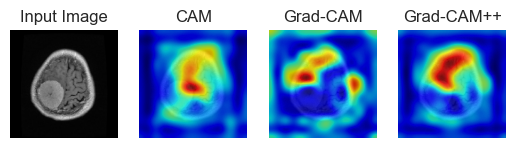

In [ ]:
for path in images:

    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)

    top_n = 5
    top = decode_predictions(predictions, top=top_n)[0]
    cls = np.argsort(predictions[0])[-top_n:][::-1]

    cam = generate_cam(model,img)
    gradcam=grad_cam(model,img)
    gradcamplus=grad_cam_plus(model,img)

    print(path)
    print("class activation map for:",top[0])
    print(type(gradcam))

# If gradcam is not a numpy array, convert it
# For example, if gradcam is a PIL Image object:
# gradcam = np.array(gradcam)

# Check the data type and shape after conversion
    print(gradcam.dtype)
    print(gradcam.shape)

    fig, ax = plt.subplots(nrows=1,ncols=4)
    plt.subplot(141)
    plt.imshow(orig_img)
    plt.title("Input Image")
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(orig_img)
    plt.imshow(cam,alpha=0.8,cmap="jet")
    plt.title("CAM")
    plt.axis('off')
    plt.subplot(143)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.8,cmap="jet")
    plt.title("Grad-CAM")
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.8,cmap="jet")
    plt.title("Grad-CAM++")
    plt.axis('off')
    plt.show()